In [1]:
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from PIL import ImageGrab
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2

## Question 1
### A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

### Answer

In [2]:
# Assume Null hyposthesis as Ho: μ1 = μ2 (There is no difference in diameters of cutlets between two units).

# Thus Alternate hypothesis as Ha: μ1 ≠ μ2 (There is significant difference in diameters of cutlets between two units) 2 Sample 2 Tail test applicable
# Here there are two samples so the 2 sample test will be carried out
# also the sample size n=35 which is grater the 30 so the Z or t test can be cariies out
# sigma population is not given so t-test will be performed.
#2 sample 2 tail t-test will be conducted

In [3]:
# Decide a cut-off value
# Significance 5%
# alpha = 0.05
# As it is a two-tailed test
# alpha/2 = 0.025

In [4]:
cutlets = pd.read_csv('Cutlets.csv')

In [5]:
cutlets.head()

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


In [6]:
# checking null values
cutlets.isnull().sum()

Unit A    0
Unit B    0
dtype: int64

In [7]:
cutlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
Unit A    35 non-null float64
Unit B    35 non-null float64
dtypes: float64(2)
memory usage: 640.0 bytes


In [8]:
unita = pd.Series(cutlets.iloc[:,0])
unita.head()

0    6.8090
1    6.4376
2    6.9157
3    7.3012
4    7.4488
Name: Unit A, dtype: float64

In [9]:
unitb = pd.Series(cutlets.iloc[:,1])
unitb.head()

0    6.7703
1    7.5093
2    6.7300
3    6.7878
4    7.1522
Name: Unit B, dtype: float64

Text(0.5,1,'Unit A')

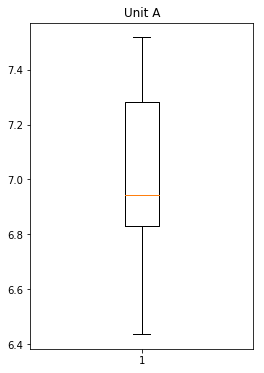

In [10]:
plt.subplots(figsize = (4,6))
plt.boxplot(cutlets['Unit A'])
plt.title('Unit A')

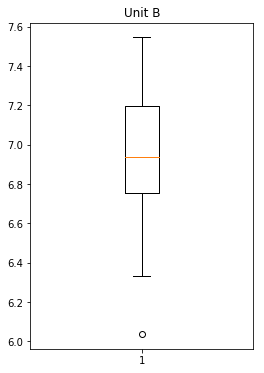

In [11]:
plt.subplots(figsize = (4,6))
plt.boxplot(cutlets['Unit B'])
plt.title('Unit B')
plt.show()

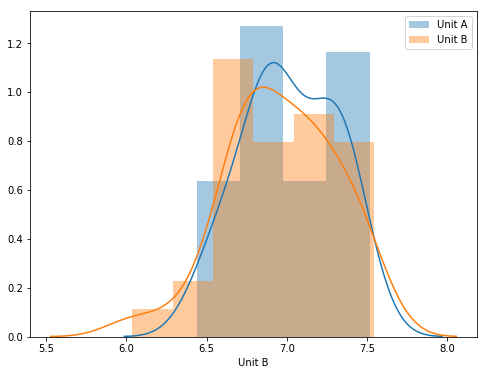

In [12]:
plt.figure(figsize = (8,6))
labels = ['Unit A', 'Unit B']
sns.distplot(cutlets['Unit A'],hist= True)
sns.distplot(cutlets['Unit B'],hist = True)
plt.legend(labels)

In [13]:
# Compare Evidences with Hypothesis using t-statistics
# 2 sample 2 tail t-test will be conducted. stats.ttest_ind(array1,array2)     # ind -> independent samples
p_value=stats.ttest_ind(a=unita, b=unitb, equal_var=True)
p_value

Ttest_indResult(statistic=0.7228688704678061, pvalue=0.4722394724599501)

In [14]:
p_value[1]

0.4722394724599501

In [15]:
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value[1]))
if p_value[1] <= alpha:
    print('We reject Null Hypothesis there is a significance difference between two Units A and B')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.025, p=0.472
We fail to reject Null hypothesis


#### Hence, We fail to reject Null Hypothesis because of lack of evidence, there is no significant difference between the two samples

## Question 2
### A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level.

### Answer

In [16]:
# Here there are four samples so the ANOVA test will be carried out
# Assume Null hyposthesis as Ho: μ1 = μ2 = μ3 = μ4.
# Thus Alternate hypothesis as Ha: atleast one of them is diferent

In [17]:
tat = pd.read_csv('LabTAT.csv')
tat.head()

,Laboratory 1,Laboratory 2,Laboratory 3,Laboratory 4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79
2,192.77,194.92,201.23,185.18
3,177.33,183.00,199.61,176.42
4,193.41,169.57,204.63,152.60


In [18]:
# checking null values
tat.isnull().sum()

Laboratory 1    0
Laboratory 2    0
Laboratory 3    0
Laboratory 4    0
dtype: int64

In [19]:
tat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
Laboratory 1    120 non-null float64
Laboratory 2    120 non-null float64
Laboratory 3    120 non-null float64
Laboratory 4    120 non-null float64
dtypes: float64(4)
memory usage: 3.8 KB


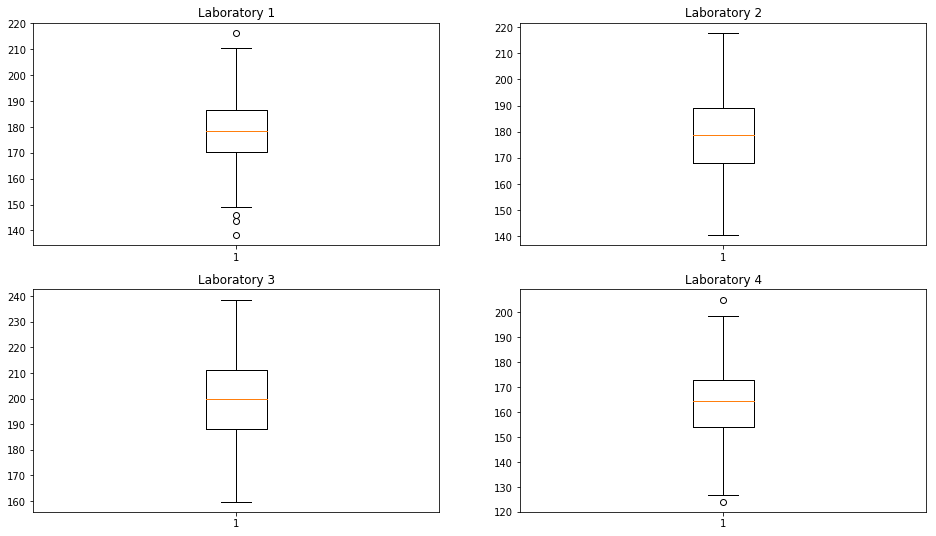

In [20]:
plt.subplots(figsize = (16,9))
plt.subplot(221)
plt.boxplot(tat['Laboratory 1'])
plt.title('Laboratory 1')
plt.subplot(222)
plt.boxplot(tat['Laboratory 2'])
plt.title('Laboratory 2')
plt.subplot(223)
plt.boxplot(tat['Laboratory 3'])
plt.title('Laboratory 3')
plt.subplot(224)
plt.boxplot(tat['Laboratory 4'])
plt.title('Laboratory 4')
plt.show()

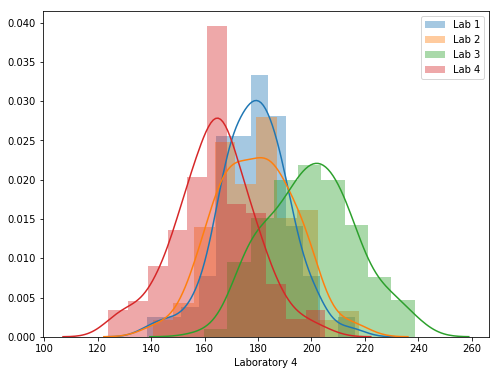

In [21]:
plt.figure(figsize = (8,6))
labels = ['Lab 1', 'Lab 2','Lab 3', 'Lab 4']
sns.distplot(tat['Laboratory 1'],hist = True)
sns.distplot(tat['Laboratory 2'],hist = True)
sns.distplot(tat['Laboratory 3'],hist = True)
sns.distplot(tat['Laboratory 4'],hist = True)
plt.legend(labels)

In [22]:
# Compare Evidences with Hypothesis using t-statistics
# 4 sample 2 tail t-test will be conducted. stats.ttest_ind(array1,array2)     # ind -> independent samples
p_value=stats.f_oneway(tat.iloc[:,0], tat.iloc[:,1], tat.iloc[:,2], tat.iloc[:,3])

In [23]:
p_value[1]

2.1156708949992414e-57

In [24]:
alpha = 0.025
print('Significnace=%.3f, p=%.3f' % (alpha, p_value[1]))
if p_value[1] <= alpha:
    print('We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.025, p=0.000
We reject Null Hypothesis there is a significance difference between TAT of reports of the laboratories


#### Hence, We fail to reject Null Hypothesis because of lack evidence, there is no significant difference between the samples

## Question 3

### Answer

In [25]:
ratio = pd.read_csv('BuyerRatio.csv')
ratio.head()

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [26]:
# As given Null hyposthesis as Ho: μ1 = μ2 (There is no difference in male and female based buyer ratio across regions).
# Thus Alternate hypothesis as Ha: μ1 ≠ μ2 (There is significant difference in male and female based buyer ratio across regions)
# As per the data we need to find wether there is a difference in male and female based buyer ratio across regions.
# so there will be two possiblities - yes/no and one out come
# so the test conducted will be chi-square test.

In [27]:
ratio=ratio.iloc[:,1:5]
ratio

,East,West,North,South
0,50,142,131,70
1,435,1523,1356,750


In [28]:
ratio.values

array([[  50,  142,  131,   70],
       [ 435, 1523, 1356,  750]], dtype=int64)

In [29]:
ratio1=stats.chi2_contingency(ratio)

In [30]:
ratio1

(1.595945538661058,
 0.6603094907091882,
 3,
 array([[  42.76531299,  146.81287862,  131.11756787,   72.30424052],
        [ 442.23468701, 1518.18712138, 1355.88243213,  747.69575948]]))

In [31]:
chi_square=sum([(o-e)**2/e for o,e in zip(ratio.values,ratio1[3])])
chi_square_statestic=chi_square[0]+chi_square[1]
chi_square_statestic

1.5152956451130446

In [32]:
critical_value=chi2.ppf(0.95,3)
critical_value

7.814727903251179

In [33]:
if chi_square_statestic >= critical_value:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0)')

Independent (fail to reject H0)


In [34]:
pvalue=1-chi2.cdf(chi_square_statestic,3)
pvalue

0.6787446296467897

In [35]:
if pvalue <= 0.05:
	print('Dependent (reject H0)')
else:
	print('Independent (fail to reject H0 -  because of lack evidence, there is no significant difference in male and female based buyer ratio across regions)')

Independent (fail to reject H0 -  because of lack evidence, there is no significant difference in male and female based buyer ratio across regions)


#### Hence, We fail to reject Null Hypothesis because of lack evidence, there is no significant difference in male and female based buyer ratio across regions

## Question 4

### Answer

In [36]:
inference = pd.read_csv('Costomer+OrderForm.csv')

In [37]:
# As given Null hyposthesis as Ho: μ1 = μ2 (There is no difference in defective % between various centre).
# Thus Alternate hypothesis as Ha: μ1 ≠ μ2 (There is significant difference in defective % between various centre)
# As per the data we need to find wether there is a difference in defective % between various centre.
# so there will be two possiblities - yes/no and one out come
# so the test conducted will be chi-square test.

In [38]:
inference.head()

,Phillippines,Indonesia,Malta,India
0,Error Free,Error Free,Defective,Error Free
1,Error Free,Error Free,Error Free,Defective
2,Error Free,Defective,Defective,Error Free
3,Error Free,Error Free,Error Free,Error Free
4,Error Free,Error Free,Defective,Error Free


In [39]:
inference.tail()

,Phillippines,Indonesia,Malta,India
295,Error Free,Error Free,Error Free,Error Free
296,Error Free,Error Free,Error Free,Error Free
297,Error Free,Error Free,Defective,Error Free
298,Error Free,Error Free,Error Free,Error Free
299,Error Free,Defective,Defective,Error Free


In [40]:
inference.describe()

,Phillippines,Indonesia,Malta,India
count,300,300,300,300
unique,2,2,2,2
top,Error Free,Error Free,Error Free,Error Free
freq,271,267,269,280


In [41]:
inference.isnull().sum()

Phillippines    0
Indonesia       0
Malta           0
India           0
dtype: int64

In [42]:
print(inference['Phillippines'].value_counts(),'\n',inference['Indonesia'].value_counts(),'\n',inference['Malta'].value_counts(),'\n',inference['India'].value_counts())

Error Free    271
Defective      29
Name: Phillippines, dtype: int64 
 Error Free    267
Defective      33
Name: Indonesia, dtype: int64 
 Error Free    269
Defective      31
Name: Malta, dtype: int64 
 Error Free    280
Defective      20
Name: India, dtype: int64


In [43]:
inference1 = [[271,267,269,280],[29,33,31,20]]

In [44]:
stat, p, df, exp = stats.chi2_contingency(inference1)
print("Statistics = ",stat,"\n",'P_Value = ', p,'\n', 'degree of freedom =', df,'\n', 'Expected Values = ', exp)

Statistics =  3.858960685820355 
 P_Value =  0.2771020991233135 
 degree of freedom = 3 
 Expected Values =  [[271.75 271.75 271.75 271.75]
 [ 28.25  28.25  28.25  28.25]]


In [45]:
observed = np.array([271, 267, 269, 280, 29, 33, 31, 20])
expected = np.array([271.75, 271.75, 271.75, 271.75, 28.25, 28.25, 28.25, 28.25])

In [51]:
test_statistic , p_value = stats.chisquare(observed, expected, ddof = df)
print("Test Statistic = ",test_statistic,'\n', 'p_value =',p_value)

Test Statistic =  3.858960685820355 
 p_value = 0.4254298144535761


In [56]:
alpha = 0.05
print('Significnace=%.3f, p=%.3f' % (alpha, p_value))
if p_value <= alpha:
    print('We reject Null Hypothesis there is a significance difference in defective % between various centre')
else:
    print('We fail to reject Null hypothesis')

Significnace=0.050, p=0.425
We fail to reject Null hypothesis
